In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
study_results_path = "Resources/Study_results.csv"
mouse_metadata_path = "Resources/Mouse_metadata.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
 # Checking the number of mice.
total_mice = mouse_merge['Mouse ID'].nunique()
total_mice

249

In [7]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_duplicates = mouse_merge[mouse_merge.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
drop_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_merge.loc[mouse_merge["Mouse ID"] != "g989"]
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_clean = clean_mouse['Mouse ID'].nunique()
mice_clean

248

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# First we group the dataframe so we have the table grouped by regimen
group_regimen = clean_mouse.groupby('Drug Regimen')

In [11]:
mean = group_regimen['Tumor Volume (mm3)'].mean()
median = group_regimen['Tumor Volume (mm3)'].median()
standard_dev = group_regimen['Tumor Volume (mm3)'].std()
sem = group_regimen['Tumor Volume (mm3)'].sem()
statistical_summary = pd.concat([mean, median, standard_dev, sem], axis=1)
statistical_summary.columns=["Mean", "Median", "Standard Deviation", "SEM"]
statistical_summary["Mean"] = statistical_summary["Mean"].astype(float).map(
    "{:,.2f}".format)
statistical_summary["Median"] = statistical_summary["Median"].astype(float).map(
    "{:,.2f}".format)
statistical_summary["Standard Deviation"] = statistical_summary["Standard Deviation"].astype(float).map(
    "{:,.2f}".format)
statistical_summary["SEM"] = statistical_summary["SEM"].astype(float).map(
    "{:,.2f}".format)
statistical_summary

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.32,50.45,6.62,0.54
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_mouse.groupby('Drug Regimen').agg('Tumor Volume (mm3)': mean, median, np.std, sem)

SyntaxError: invalid syntax (<ipython-input-12-00aaab1fc62b>, line 2)

In [14]:
group_regimen.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [78]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_count = group_regimen['Mouse ID'].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<AxesSubplot:title={'center':'Drug Regimen Measurment'}, xlabel='Drug Regimen', ylabel='Mice count'>

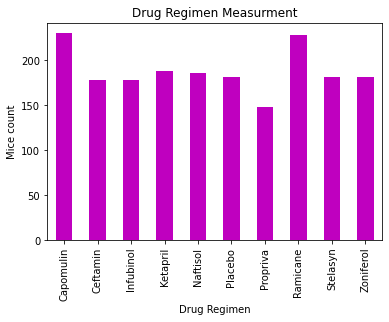

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_pandas = mouse_count.plot.bar(x= 'Drug Regimen', y='Mouse ID', title='Drug Regimen Measurment',
                                  xlabel= 'Drug Regimen', ylabel='Mice count', color='m')
bar_pandas

In [62]:
 # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names = sorted(clean_mouse['Drug Regimen'].unique())

Text(0, 0.5, 'Mice count')

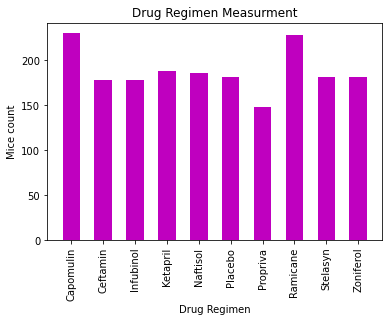

In [50]:
x_axis = np.arange(len(group_regimen['Drug Regimen']))
plt.bar(x_axis, mouse_count,0.55, color="m", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation = 90)
plt.title("Drug Regimen Measurment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice count")


<AxesSubplot:ylabel='Mouse ID'>

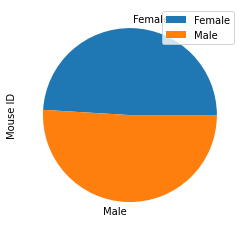

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = clean_mouse.groupby('Sex').count()
sex_group.plot(kind='pie', y='Mouse ID')


In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_group

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [123]:
labels = sorted(clean_mouse['Sex'].unique())
labels

['Female', 'Male']

In [126]:
mouse_sex = sex_group['Mouse ID'].count()
colors = ["tab:blue", "tab:orange"]
explode = (0,0)
mouse_sex = sex_group['Mouse ID']

Text(0, 0.5, 'Mouse ID')

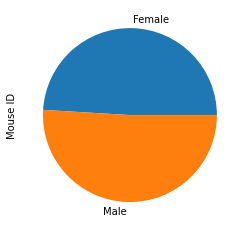

In [140]:
plt.pie(mouse_sex, explode=explode, labels=labels, colors=colors, 
        shadow=False, startangle=360, counterclock=True)
plt.ylabel("Mouse ID")

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [159]:
latest_entry = clean_mouse.sort_values("Timepoint", ascending=False)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
1344,p136,Zoniferol,Female,5,28,45,63.488697,2
874,g296,Zoniferol,Female,14,29,45,68.163195,4
884,g497,Ketapril,Male,19,28,45,69.872251,2
360,g316,Capomulin,Female,22,22,45,40.159220,2
1787,x773,Placebo,Female,21,30,45,58.634971,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1719,w575,Zoniferol,Female,16,28,45,68.401286,3
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
